# Sentiment Analysis sobre reviews
						
El objetivo es construir un clasificador el cual pueda predecir si una revisión realizada por un usuario es positiva o negativa (buena o mala).
Para ello, se utiliza un conjunto de datos que pertenece a la plataforma Yelp. Esta, posee una red de usuarios, los cuales realizan opiniones sobre lugares nocturnos, espacios culturales, locales comerciales, entre otros.
- Realizar un análisis de features, así como su preparación necesaria antes de iniciar el desarrollo del modelo.
						
## Objetivos
Generar un modelo de machine learning el cual pueda clasificar review en inglés para la plataforma Yelp. El modelo recibirá una review de un usuario, y deberá ser capaz de determinar si esta es positiva o negativa.

## Dataset

Las features que contiene el  dataset son:
				
-  business_id: identificador del negocio al que se está realizando la review.
-  cool: cantidad de votos por haber sido una review “cool”.
-  date: fecha de realización de la revisión
-  funny: cantidad de votos para una revisión “divertida”.
-  review_id: identificador único de revisión (ofuscado).
-  stars: cantidad de estrellas otorgadas por el usuario en referencia a la review.
-  text: revisión realizada por el usuario sobre un determinado negocio.
-  useful: cantidad de votos recibido por los usuarios a los cuales le resultó útil la revisión.
-  user_id: id del usuario en la plataforma (ofuscado)
 
## Consideraciones

- No contamos con una variable target como pasa en problemas de la vida real. Por ello, un desafío extra que se presenta es cómo definir un target, basado en las features del dataset.
			
- Muchas veces cuando importamos un dataset pandas infiere que valor podría ser, de no encontrar un valor conocido pone uno por defecto. Validar que los tipos de datos de las features después de importarse correspondan con su valor intrínseco es una buena práctica.

-  Haga una rápida exploración de valores atípicos (outliers) del conjunto de datos. Realice los gráficos que considere pertinente para entender la naturaleza del problema.

## Evaluación
 								
Para la evaluación de los modelos utilizar las siguientes métricas:
 							
- Precision
- Recall
    - F1-score
    - Análisis de AUC ROC


In [1]:
# Imports utilizados a lo largo del práctico
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Carga dataset
data = pd.read_csv('reviews_yelp_nn.csv.gz', compression='gzip', sep="\t", error_bad_lines=False, quotechar = '"', low_memory=False)

In [3]:
# Shape, Columns,  Datatype
print(f"Shape of the dataset: {data.shape} \n")
print(f"Column names:\n {data.columns} \n")
print(f"Datatype of each column:\n {data.dtypes}")

Shape of the dataset: (3342958, 9) 

Column names:
 Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id'],
      dtype='object') 

Datatype of each column:
 business_id     object
cool            object
date            object
funny          float64
review_id       object
stars          float64
text            object
useful         float64
user_id         object
dtype: object


In [4]:
# Creo una columna nueva para la longitud de la review.
data['review_len']=data.text.astype(str).apply(len)

In [5]:
data.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,review_len
0,EhGPj8iJDIdaHnWg9d5BgA,0,2016-04-20 14:30:53,0.0,uJRdHLz4XNmDK5pOkWbZNA,5.0,"Best Dim Sum in the city, their cart service i...",0.0,POETn3fQcZ8ngLAARCATSg,281
1,VPcFNI-6HICR5SJM--KjNA,5,2013-05-14 03:08:12,2.0,TlPh8jy8bt_TSGfjEw-pvA,5.0,How... HOW did I not head down here sooner? Fo...,7.0,oUK6Xs5dPPnP4whFeZExGg,1546
2,ugdUuApH3pYXggW5qpbALg,0,2016-08-26 16:51:37,0.0,GmoBAVE1pTo0kjmeKrXmLQ,4.0,Carnitas were wonderful. First time there and ...,0.0,SiaSUNlKQK7f57WBPmyyNw,206
3,3fCxmmg8nHGaE5upJWQUrw,0,2016-03-24 17:23:19,0.0,ZHuM9P81zfuNuFZ5ThXNRg,5.0,Great staff who are always willing to help. I ...,0.0,PsH5Qi8R69WAlhNv8mXWRA,275
4,LAqbIi2TDn8BDvPB0nLVhQ,1,2012-10-25 15:02:48,0.0,-2Ce00mfWYP20yt7k6kARg,3.0,"This place is bigger, brighter, new so it's cl...",3.0,r-zUIQPaHzvIyL93wQaoiQ,289


veo como se distribuyen las longitudes de las reviews

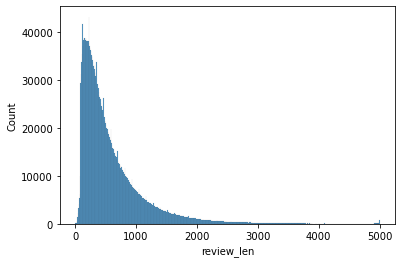

count   3342958.00000
mean        602.49914
std         568.62338
min           1.00000
25%         237.00000
50%         425.00000
75%         765.00000
max        5000.00000
Name: review_len, dtype: float64

In [6]:
sns.histplot(data=data, x='review_len')
plt.show()
pd.set_option('display.float_format', lambda x: '%.5f' % x)
data.review_len.describe()

In [7]:
# Se eliminan aquellos registros cuyo texto es NaN
data.dropna(subset=['text'], inplace=True)

Text(0.5, 1.0, 'Review length according to #stars')

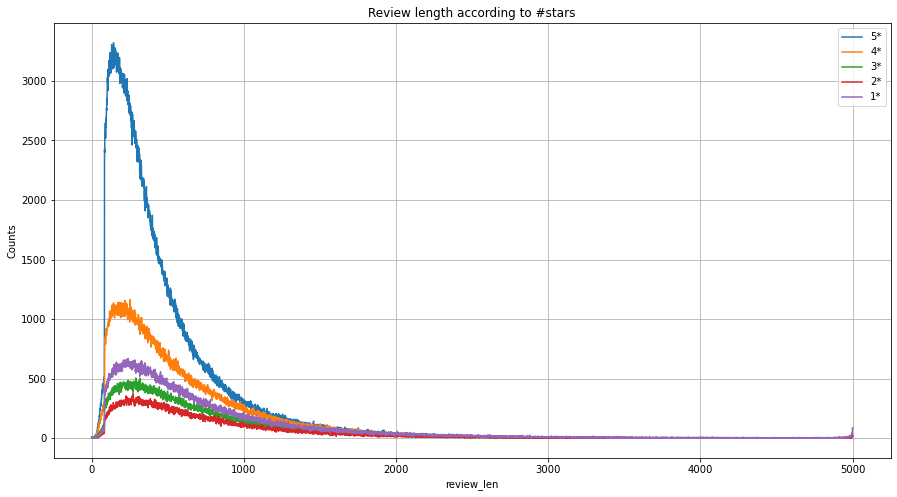

In [8]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
data[data['stars'] == 5].groupby('review_len').size().plot(ax=axes, label='5*')
data[data['stars'] == 4].groupby('review_len').size().plot(ax=axes, label='4*')
data[data['stars'] == 3].groupby('review_len').size().plot(ax=axes, label='3*')
data[data['stars'] == 2].groupby('review_len').size().plot(ax=axes, label='2*')
data[data['stars'] == 1].groupby('review_len').size().plot(ax=axes, label='1*')
axes.set_ylabel('Counts')
axes.grid(which='both')
axes.legend()
axes.set_title('Review length according to #stars')

In [9]:
# Se eliminan aquellos reviews con menos de 80 caracteres
data = data[data.review_len > 80].copy()

Text(0.5, 1.0, 'Review length according to #stars')

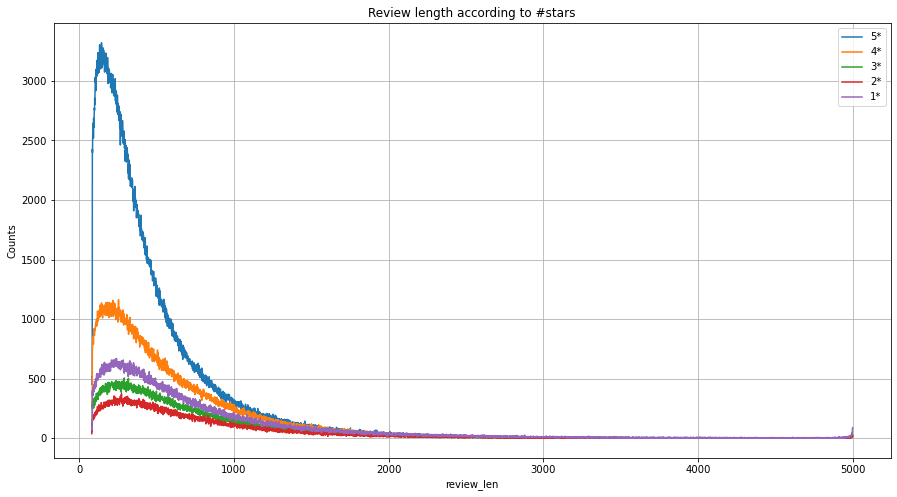

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
data[data['stars'] == 5].groupby('review_len').size().plot(ax=axes, label='5*')
data[data['stars'] == 4].groupby('review_len').size().plot(ax=axes, label='4*')
data[data['stars'] == 3].groupby('review_len').size().plot(ax=axes, label='3*')
data[data['stars'] == 2].groupby('review_len').size().plot(ax=axes, label='2*')
data[data['stars'] == 1].groupby('review_len').size().plot(ax=axes, label='1*')
axes.set_ylabel('Counts')
axes.grid(which='both')
axes.legend()
axes.set_title('Review length according to #stars')

In [11]:
d = {1 :-1, 2: -1, 3: 0, 4: 1, 5: 1} 
data['stars'] = data['stars'].map(d) 
data.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,review_len
0,EhGPj8iJDIdaHnWg9d5BgA,0,2016-04-20 14:30:53,0.00000,uJRdHLz4XNmDK5pOkWbZNA,1,"Best Dim Sum in the city, their cart service i...",0.00000,POETn3fQcZ8ngLAARCATSg,281
1,VPcFNI-6HICR5SJM--KjNA,5,2013-05-14 03:08:12,2.00000,TlPh8jy8bt_TSGfjEw-pvA,1,How... HOW did I not head down here sooner? Fo...,7.00000,oUK6Xs5dPPnP4whFeZExGg,1546
2,ugdUuApH3pYXggW5qpbALg,0,2016-08-26 16:51:37,0.00000,GmoBAVE1pTo0kjmeKrXmLQ,1,Carnitas were wonderful. First time there and ...,0.00000,SiaSUNlKQK7f57WBPmyyNw,206
3,3fCxmmg8nHGaE5upJWQUrw,0,2016-03-24 17:23:19,0.00000,ZHuM9P81zfuNuFZ5ThXNRg,1,Great staff who are always willing to help. I ...,0.00000,PsH5Qi8R69WAlhNv8mXWRA,275
4,LAqbIi2TDn8BDvPB0nLVhQ,1,2012-10-25 15:02:48,0.00000,-2Ce00mfWYP20yt7k6kARg,0,"This place is bigger, brighter, new so it's cl...",3.00000,r-zUIQPaHzvIyL93wQaoiQ,289


In [12]:
data["stars"].value_counts(normalize = True)

 1   0.65755
-1   0.23192
 0   0.11053
Name: stars, dtype: float64

In [13]:
print(data.shape)

(3316932, 10)


In [14]:
data_to_process = data[data.review_len > data.review_len.describe()['50%']].copy()
print(data_to_process.shape)

(1658448, 10)


Evalúo si hay correlación entre _stars_ y la longitud de las reviews

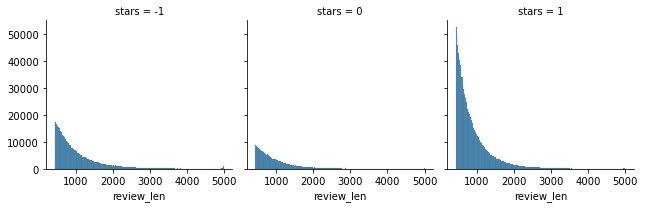

In [15]:
graph = sns.FacetGrid(data=data_to_process,col='stars')
graph.map(sns.histplot,'review_len', bins=200)

Hay 3 columnas para el voto. _funny_, _cool_ y _useful_. <br> 
Veo valores medios de esas categorias de voto repecto del la cantidad de _stars_ que le dieron en la review.

In [16]:
# Por alguna eventualidad, necesito que cool sea floatante.
data_to_process["cool"] = pd.to_numeric(data_to_process.cool)

In [17]:
data_to_process["text"] = data_to_process.text.astype(str)

In [18]:
data_to_process.shape

(1658448, 10)

In [19]:
import string
punct_list = list(string.punctuation)

In [20]:
def remove_punctuation(text):
    # lower case
    text = text.lower()
    # replace striplines
    text = text.replace('\n', '')
    # remove punctuation
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, '')
    return text.strip()

In [21]:
print(data_to_process["text"].iloc[0])

How... HOW did I not head down here sooner? For real. When Yelpers say there's a Calgary establishment and I need to drive halfway across town to get to it, I need to get my ass in my car and go. 

Bill's. Where has your ginger beef been all my life? What's that? Right in your kitchen, served on your tables, mouths and mouths before me having devoured it's gingery and crunchy goodness while I went without even though I knew better... the reviews told me better.

I am a ginger beef fanatic. I love the stuff, always have ever since I was a wee tot and old enough for my mother to feed me Western Chinese food. There were 3 things I would eat. Chicken balls, chicken fried rice and ginger beef. Except if I had had Bill's, the rest would've been spoiled for me after that! And now... this will be the case. 

It's not just the ginger beef here that gets my 5 stars though. It's that it's just a consistently solid experience. Just like everyone said, Bill himself was there to greet us at the door

In [22]:
data_to_process["text"] = data_to_process.text.apply(remove_punctuation)

In [23]:
print(data_to_process["text"].iloc[0])

how how did i not head down here sooner for real when yelpers say theres a calgary establishment and i need to drive halfway across town to get to it i need to get my ass in my car and go bills where has your ginger beef been all my life whats that right in your kitchen served on your tables mouths and mouths before me having devoured its gingery and crunchy goodness while i went without even though i knew better the reviews told me betteri am a ginger beef fanatic i love the stuff always have ever since i was a wee tot and old enough for my mother to feed me western chinese food there were 3 things i would eat chicken balls chicken fried rice and ginger beef except if i had had bills the rest wouldve been spoiled for me after that and now this will be the case its not just the ginger beef here that gets my 5 stars though its that its just a consistently solid experience just like everyone said bill himself was there to greet us at the door when we walked up the stairs we snagged the l

In [24]:
data_sampled = data_to_process
#data_sampled = data_to_process.sample(frac=0.10, random_state=1)

In [25]:
data_sampled.shape

(1658448, 10)

Observamos que las clases están desbalanceadas

In [26]:
data_sampled["stars"].value_counts(normalize = True)

 1   0.57842
-1   0.28621
 0   0.13537
Name: stars, dtype: float64

In [27]:
data_sampled_neg = data_sampled[data_sampled['stars']==-1]

In [28]:
data_sampled_pos = data_sampled[data_sampled['stars']==1].sample(frac=0.5, random_state=1)

In [29]:
print(data_sampled_neg.shape)

(474668, 10)


In [30]:
print(data_sampled_pos.shape)

(479642, 10)


In [31]:
frames = [data_sampled_neg, data_sampled_pos]

In [32]:
data_sampled = pd.concat(frames, axis=0)

In [33]:
data_sampled.shape

(954310, 10)

In [34]:
data_sampled = data_sampled.sample(frac=0.05, random_state=1)
data_sampled.shape

(47716, 10)

# División del conjunto de datos
Tomo reviews y stars como variables para la clasificación.<br>
Me quedo con aquellos reviews que tienen_stars_ 1 y 5 para tener clasificación negativa positiva (podría tomar star=3 y tener una review promedio).

In [35]:
# Clasificación
data_classes = data_sampled[(data_sampled['stars']==-1) | (data_sampled['stars']==1)]
data_classes.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,review_len
2103888,C9ImzBi5fn742ZcAYDww2A,0,2013-03-09 22:33:06,0.00000,biTE3cHTPfaOWkl2y8_jDQ,1,what a great local place this off the beaten p...,0.00000,OXwmkyamQ5H6Ed0xZo_kQA,843
9652,tInrGCzll4k9hF34Ye1rvQ,0,2018-05-13 13:42:33,1.00000,BaQ3TBX2jLCvK1NkFJXBjw,-1,food greatservice badi was thoroughly disappoi...,9.00000,sMoLTmDGcujdEqhqJfBWHQ,869
969236,gRCEObNuHtI61xR32ytqNQ,2,2016-03-03 03:30:02,1.00000,Bmt_jZuOzYR1SAELMZHt6Q,-1,horrible horrible horriblesaw their sign on t...,10.00000,Co9mV9FRTKL0Gj56SWBE8Q,937
1281047,dVhGY-mNwTWQzK01Zxuclw,6,2009-01-01 08:56:37,5.00000,CwF4A-o0R7jsdBu3P1Vi9Q,1,for my first review of 2009 i really wanted to...,11.00000,nzsv-p1O8gCfP3XijfQrIw,1634
934752,52C6L3kbcvMO7apMEG0l2g,0,2017-09-26 19:21:57,1.00000,e5H-xkrO9tJhkt-JoqdQCg,-1,called for some help with my garage door on th...,1.00000,759m4VjWUY7fvB41UlcZHQ,540


In [36]:
data_classes.shape

(47716, 10)

In [37]:
stars_pos = data_classes[data_classes["stars"]==1]
stars_pos.shape

(23807, 10)

In [38]:
stars_neg = data_classes[data_classes["stars"]==-1]
stars_neg.shape

(23909, 10)

In [39]:
# Separo el dataset
x = data_classes['text']
y = data_classes['stars']

## Vectorization
Ahora vectorizaremos una única revisión y vemos los resultados

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
# conversión de palabras a vector considerando los stop_words en inglés
vocab = CountVectorizer(stop_words='english').fit(x)

In [41]:
print(len(vocab.vocabulary_))

138163


Vectorización de todo el conjunto de revisión y comprobación de la matriz dispersa:

In [42]:
x = vocab.transform(x)
# Tamaño de la matriz
print("Shape of the sparse matrix: ", x.shape)
# Ocurrencias no nulas
print("Non-Zero occurences: ",x.nnz)
# Matriz de densidad
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (47716, 138163)
Non-Zero occurences:  3194922
Density of the matrix =  0.048462350608851575


Dividir el conjunto de datos X en conjunto de entrenamiento y prueba:

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2,random_state=101)

In [45]:
x_train.shape

(38172, 138163)

In [46]:
y_train.shape

(38172,)

# Modelado:
Ahora varios algoritmos de ML para ver cuál ofrece el mejor rendimiento.
- Multinomial Naive Bayes
- Random Forest
- Decision Tree
- Support Vector Machine
- K Nearest Neighbour Algorithm
- XGBoost Classifier

## Multinomial Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[4021  795]
 [ 619 4109]]
Score: 85.18
Classification Report:
              precision    recall  f1-score   support

          -1       0.87      0.83      0.85      4816
           1       0.84      0.87      0.85      4728

    accuracy                           0.85      9544
   macro avg       0.85      0.85      0.85      9544
weighted avg       0.85      0.85      0.85      9544



## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:")
print(classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[4309  507]
 [ 499 4229]]
Score: 89.46
Classification Report:
              precision    recall  f1-score   support

          -1       0.90      0.89      0.90      4816
           1       0.89      0.89      0.89      4728

    accuracy                           0.89      9544
   macro avg       0.89      0.89      0.89      9544
weighted avg       0.89      0.89      0.89      9544



## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:")
print(classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[3759 1057]
 [ 997 3731]]
Score: 78.48
Classification Report:
              precision    recall  f1-score   support

          -1       0.79      0.78      0.79      4816
           1       0.78      0.79      0.78      4728

    accuracy                           0.78      9544
   macro avg       0.78      0.78      0.78      9544
weighted avg       0.78      0.78      0.78      9544



## Support Vector Machine

In [50]:
from sklearn.svm import SVC
svm = SVC(probability= True, random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:")
print(classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[4460  356]
 [ 411 4317]]
Score: 91.96
Classification Report:
              precision    recall  f1-score   support

          -1       0.92      0.93      0.92      4816
           1       0.92      0.91      0.92      4728

    accuracy                           0.92      9544
   macro avg       0.92      0.92      0.92      9544
weighted avg       0.92      0.92      0.92      9544



## K Nearest Neighbour Algorithm

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[3777 1039]
 [1070 3658]]
Score:  77.9
Classification Report:
              precision    recall  f1-score   support

          -1       0.78      0.78      0.78      4816
           1       0.78      0.77      0.78      4728

    accuracy                           0.78      9544
   macro avg       0.78      0.78      0.78      9544
weighted avg       0.78      0.78      0.78      9544



## XGBoost Classifier

In [52]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
predxgb = xgb.predict(x_test)
print("Confusion Matrix for XGBoost Classifier:")
print(confusion_matrix(y_test,predxgb))
print("Score: ",round(accuracy_score(y_test,predxgb)*100,2))
print("Classification Report:")
print(classification_report(y_test,predxgb))

C:\Users\Diez\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:05:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix for XGBoost Classifier:
[[4343  473]
 [ 412 4316]]
Score:  90.73
Classification Report:
              precision    recall  f1-score   support

          -1       0.91      0.90      0.91      4816
           1       0.90      0.91      0.91      4728

    accuracy                           0.91      9544
   macro avg       0.91      0.91      0.91      9544
weighted avg       0.91      0.91      0.91      9544



# Predicción de reviews
Veamos la predicción de reviews positivas y negativas.
## Predicción de una review positiva

In [53]:
# Review positiva
positive_review = data['text'].iloc[0]
print(positive_review)
print("Actual Rating: ",data['stars'][0])
pr_t = vocab.transform([positive_review])
print()
print("Predicted Rating (Naive Bayes): ", mnb.predict(pr_t)[0])
print("Predicted Rating (Random Forest): ", rmfr.predict(pr_t)[0])
print("Predicted Rating (Decision Tree): ", dt.predict(pr_t)[0])
print("Predicted Rating (Support Vector  Machine): ", svm.predict(pr_t)[0])
print("Predicted Rating (Knn): ", knn.predict(pr_t)[0])
print("Predicted Rating (XGBoost): ", xgb.predict(pr_t)[0])

Best Dim Sum in the city, their cart service is great and offer big selection of quality dim sum.  You can order off the menu too if there is something you haven't seen come around.  It is a little more expensive but you can't beat it, and the view is perfect for a weekend brunch.
Actual Rating:  1

Predicted Rating (Naive Bayes):  1
Predicted Rating (Random Forest):  1
Predicted Rating (Decision Tree):  1
Predicted Rating (Support Vector  Machine):  1
Predicted Rating (Knn):  1
Predicted Rating (XGBoost):  1


## Prediccion de una review negativa

In [54]:
# NEGATIVE REVIEW
negative_review = data['text'].iloc[13]
print(negative_review)
print("Actual Rating: ",data['stars'][13])
nr_t = vocab.transform([negative_review])
print()
print("Predicted Rating (Naive Bayes): ", mnb.predict(nr_t)[0])
print("Predicted Rating (Random Forest): ", rmfr.predict(nr_t)[0])
print("Predicted Rating (Decision Tree): ", dt.predict(nr_t)[0])
print("Predicted Rating (Support Vector  Machine): ", svm.predict(nr_t)[0])
print("Predicted Rating (Knn): ", knn.predict(nr_t)[0])
print("Predicted Rating (XGBoost): ", xgb.predict(nr_t)[0])

What a complete disappointment! I went for lunch with my 2 year old and ordered 2 sushi rolls, a beef slices appetizer (they call satay) and Beef Yakisoba. We were the only two customers in the restaurant and waited over 20 minutes for the appetizer only for it to be tough, dry and charred, and we waited 30 minutes for the noodle entree only for it to be dry, tough, fatty, grisly and quite frankly, inedible. When we it brought to the their attention, Joy the manager only took the beef appetizer off the bill. She said the meal was edible, so I told her, "Then you eat it." With such poor service, quality and attention, WE WILL NEVER RETURN!!! As an area local, I will not recommend this to restaurant anyone.
Actual Rating:  -1

Predicted Rating (Naive Bayes):  -1
Predicted Rating (Random Forest):  -1
Predicted Rating (Decision Tree):  -1
Predicted Rating (Support Vector  Machine):  -1
Predicted Rating (Knn):  -1
Predicted Rating (XGBoost):  -1


In [55]:
def plot_roc_curve(fpr, tpr, title_str):
    plt.figure(figsize=(12,7))    
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    for i in range(0, len(fpr)):
        plt.plot(fpr[i], tpr[i], label=str(models[i]))
        
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title_str)   
    plt.legend()   
    plt.grid(which='both')

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

In [57]:
fpr_list = []
tpr_list = []

models = [mnb, rmfr, dt, svm, knn, xgb]

for i in range(0, len(models)):
    model=models[i]
    print(model)
    model.fit(x_train, y_train)
    y_pred = model.predict_proba(x_test)
    y_pred = y_pred[:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    print('Area Under Curve (AUC): ', roc_auc_score(y_test, y_pred))
    print()

MultinomialNB()
Area Under Curve (AUC):  0.9219608364461945

RandomForestClassifier()
Area Under Curve (AUC):  0.959601666188846

DecisionTreeClassifier()
Area Under Curve (AUC):  0.7827495137471823

SVC(probability=True, random_state=101)
Area Under Curve (AUC):  0.9754280272048613

KNeighborsClassifier(n_neighbors=10)
Area Under Curve (AUC):  0.856826037433035

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
[18:39:28] WARNING: C:/Users/Administrator/workspace

C:\Users\Diez\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Area Under Curve (AUC):  0.9672692169994547



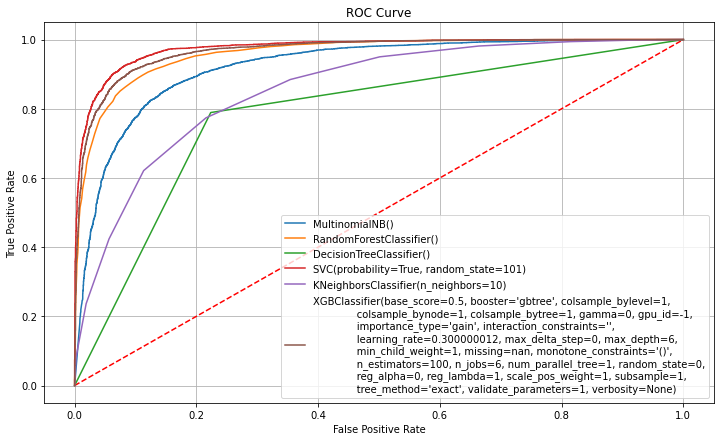

In [58]:
plot_roc_curve(fpr_list, tpr_list, title_str='ROC Curve')

#### CONCLUSIONES

-Del classification_report se observa que las clases 1 y -1 quedan balanceadas (4816, 4728) y la matriz de confusión muestra, asimismo, valores de TN/TP y FN/FP equilibrados, independientemente del modelo considerado.

-El modelo que dio lugar a los mejores resultados, para esta estrategia, fue SVM (AUC:  0.975, F1-Score: 0.92 para clase 1 y -1). Asimismo, los modelos XGBoost y RF mostraron métricas de 0.91 y 0.90 para F1-Score de la clase -1 (reviews negativos) y 0.91 y 0.89 para la clase 1 (reviews positivos). Las AUC fue de 0.967 y 0.960 para XGBoost y RF, respectivamente.
